In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=0, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, IP,downstream_YAG, crystal1,crystal2,crystal3,crystal4, slit,crl1,crl2]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 360.00034418370416 microns
FWHM in y: 360.00034418370416 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414876966694455
5.414876966694455
b 1.00
b 1.64
b 0.61
b 1.00
0.6102211874545929
19.86913187055027
19.869131870550262
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23281791,  0.        ,  0.0332055 ]), array([0.023807  , 0.        , 0.99971657]))
1.3620401788281523e-05


In [4]:
print(crystal2.alpha)

0.43404492398595806


In [5]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.2595306524099044
0.03060251960041145
0.3467890417726059


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.03
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: -9.15
zx: 134.13
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.21
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: -3.71
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: 12.30
zx: 360.25
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.02 mrad
dr

<IPython.core.display.Javascript object>


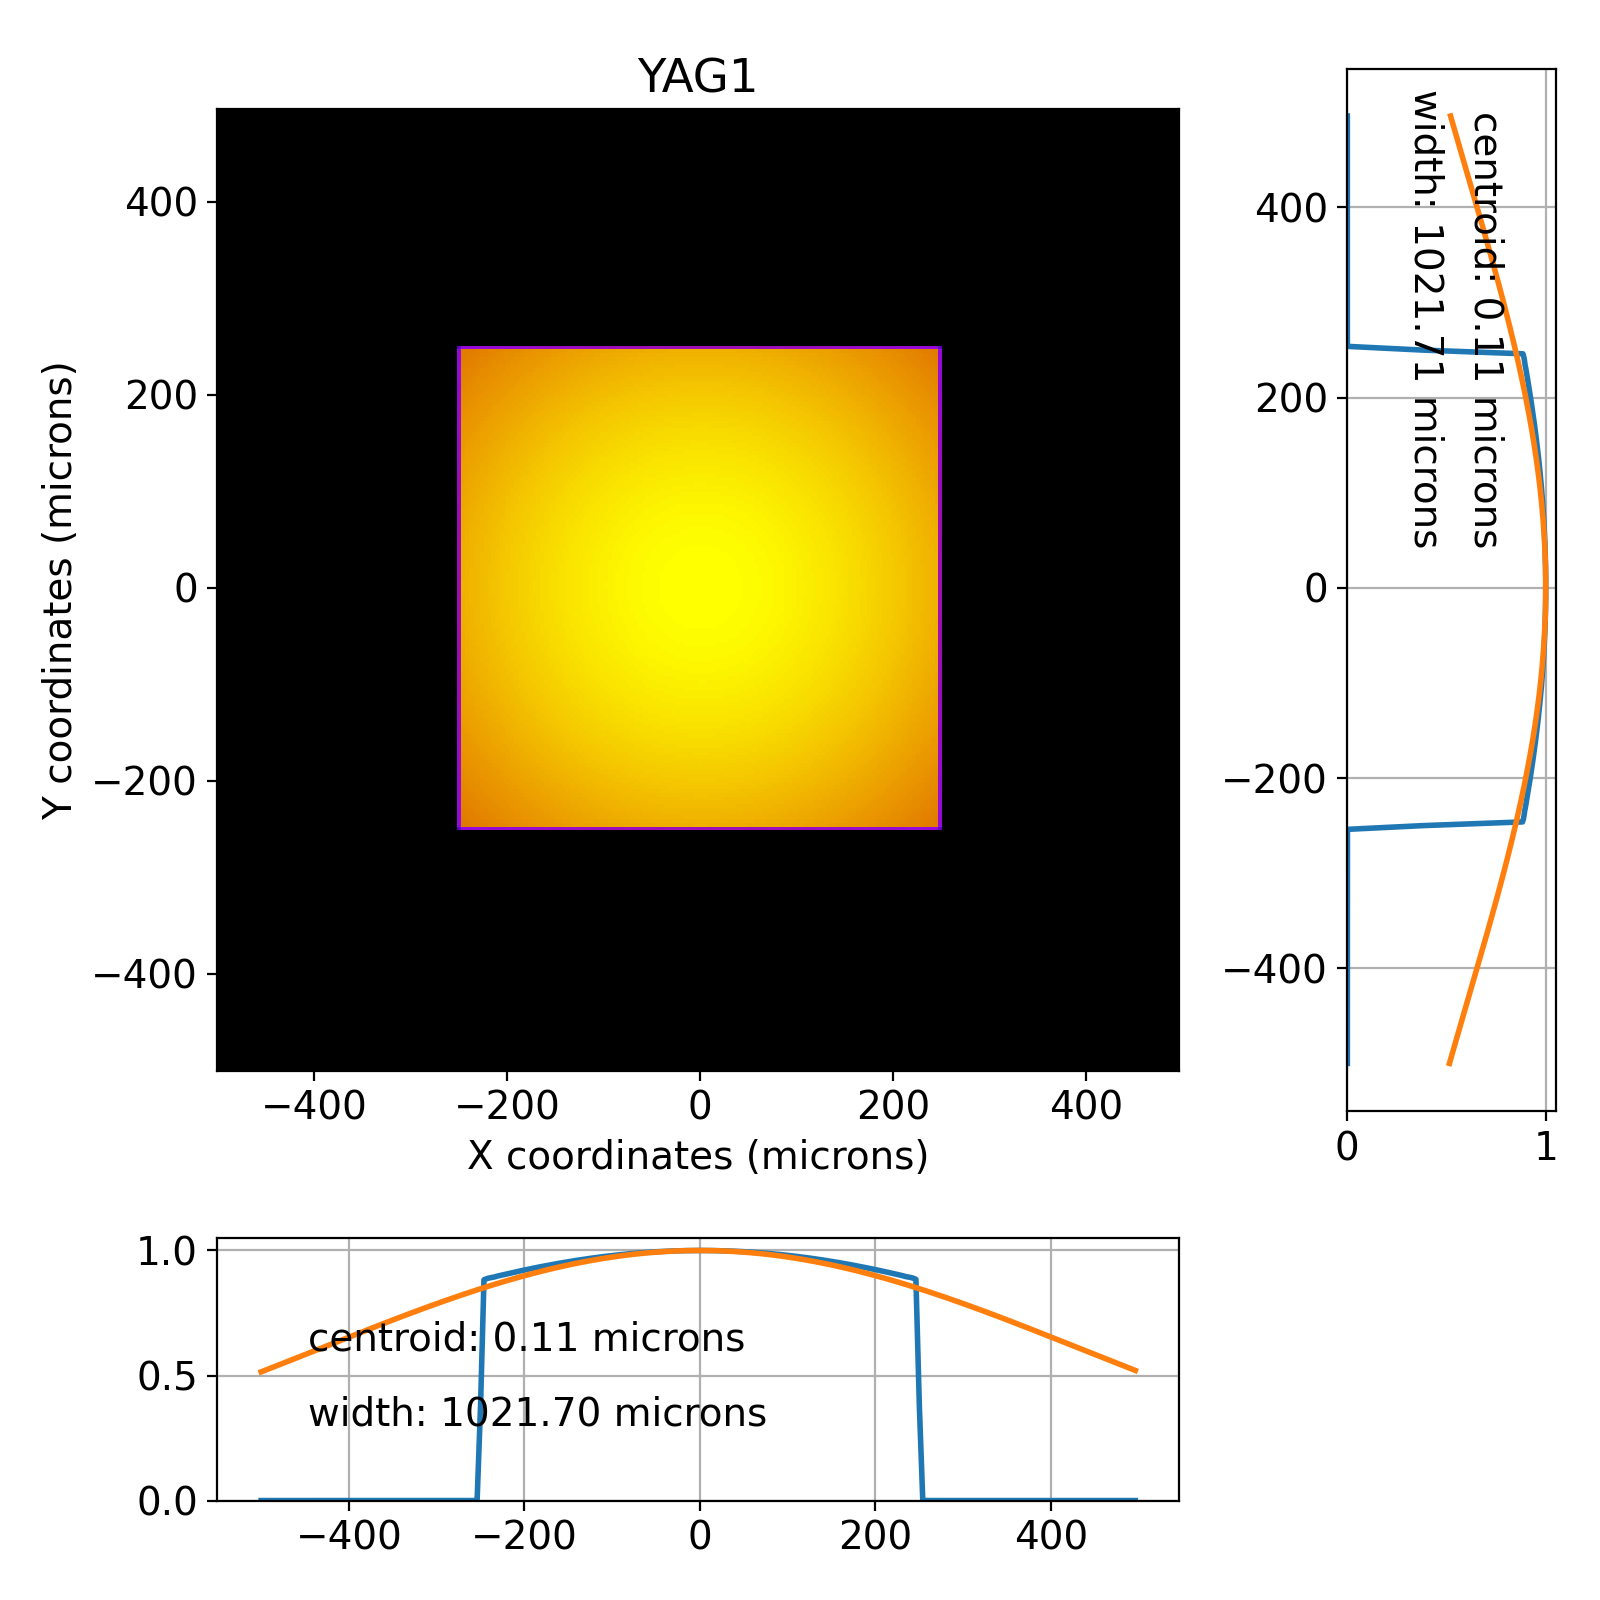

<IPython.core.display.Javascript object>


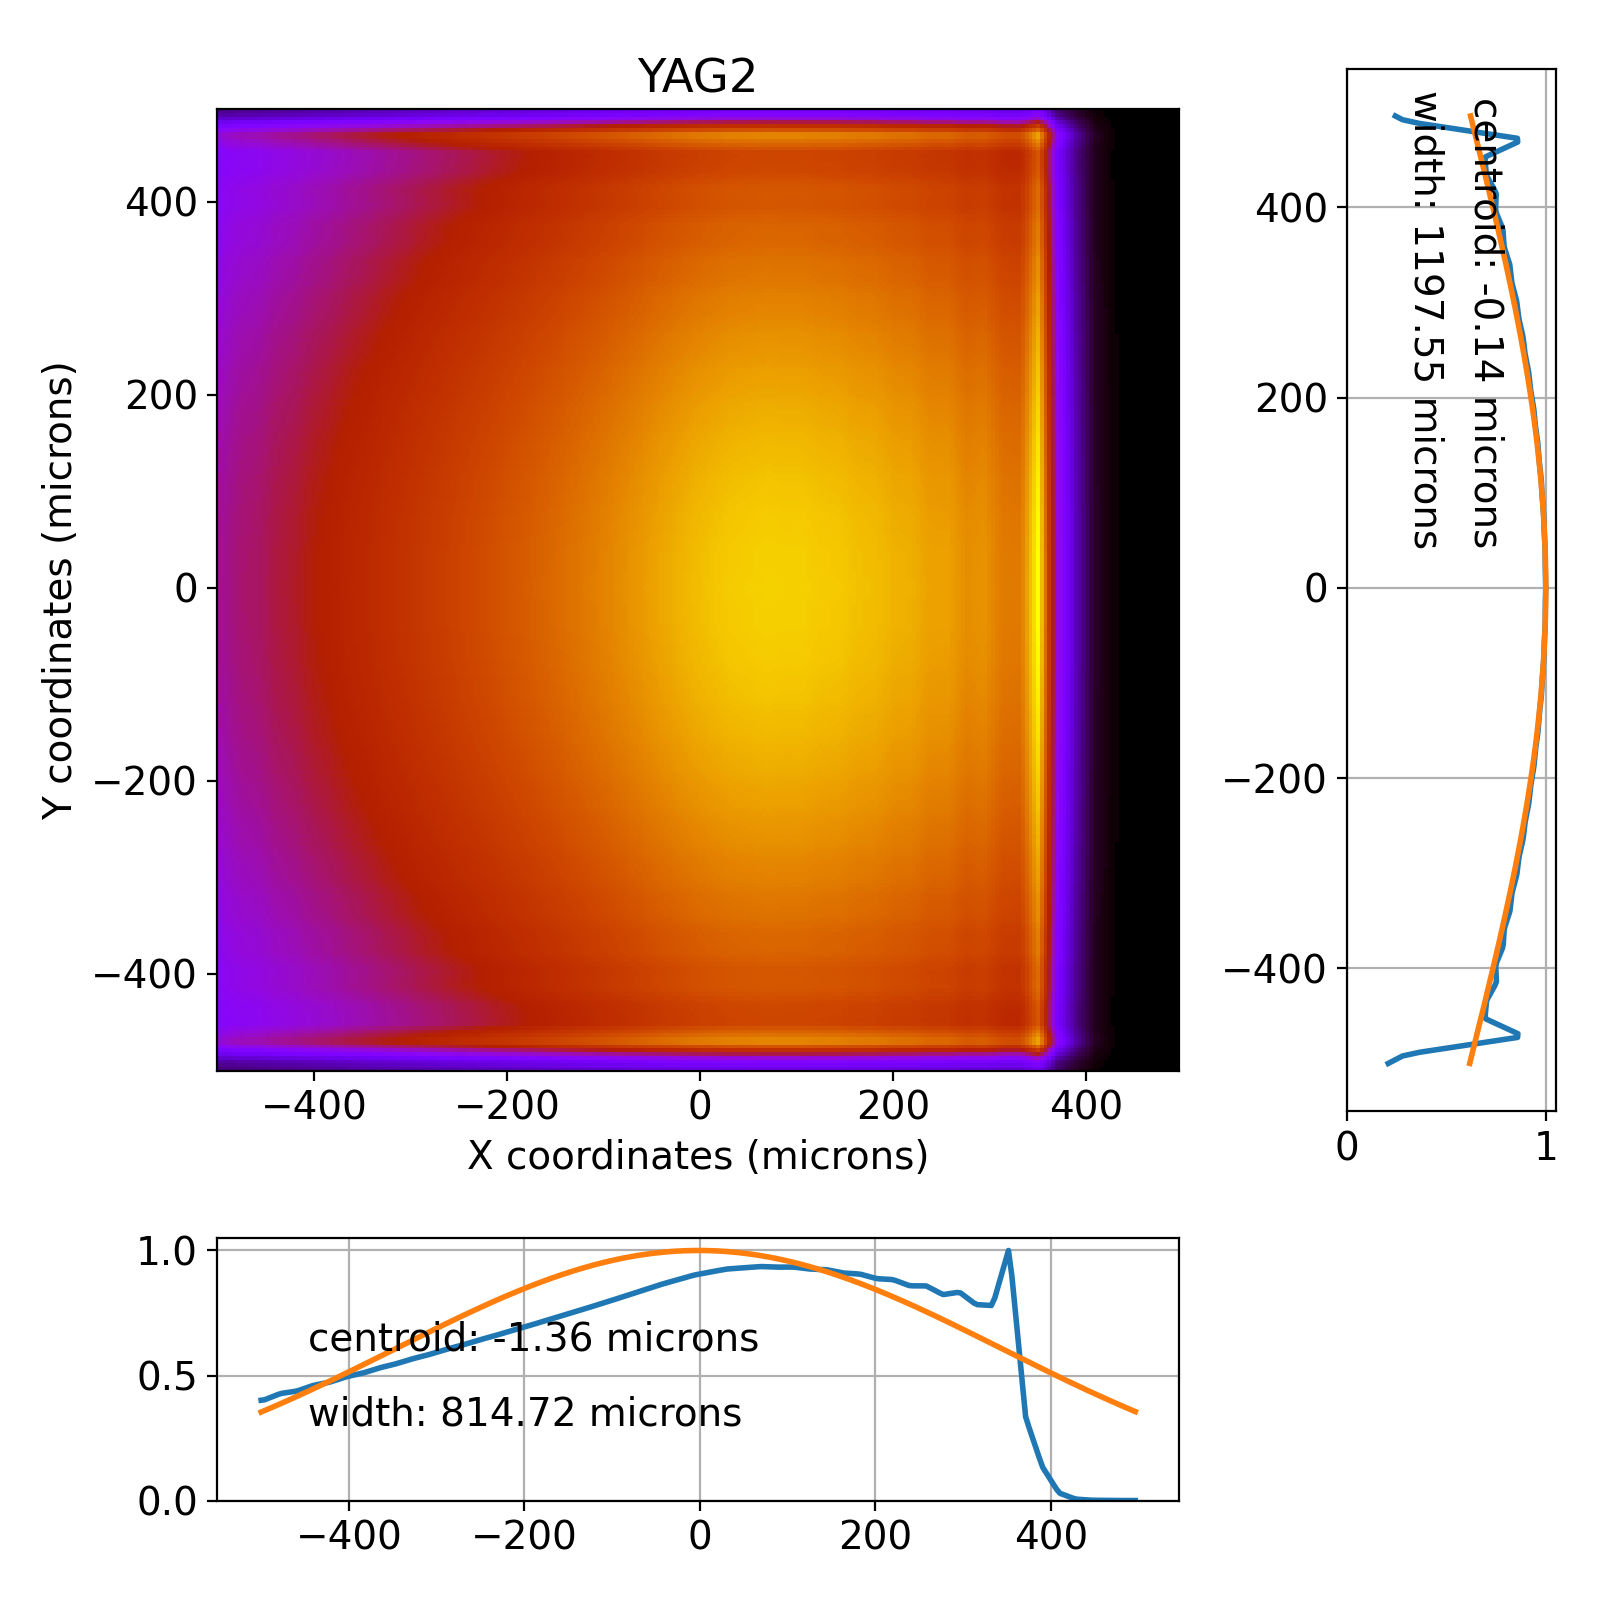

<IPython.core.display.Javascript object>


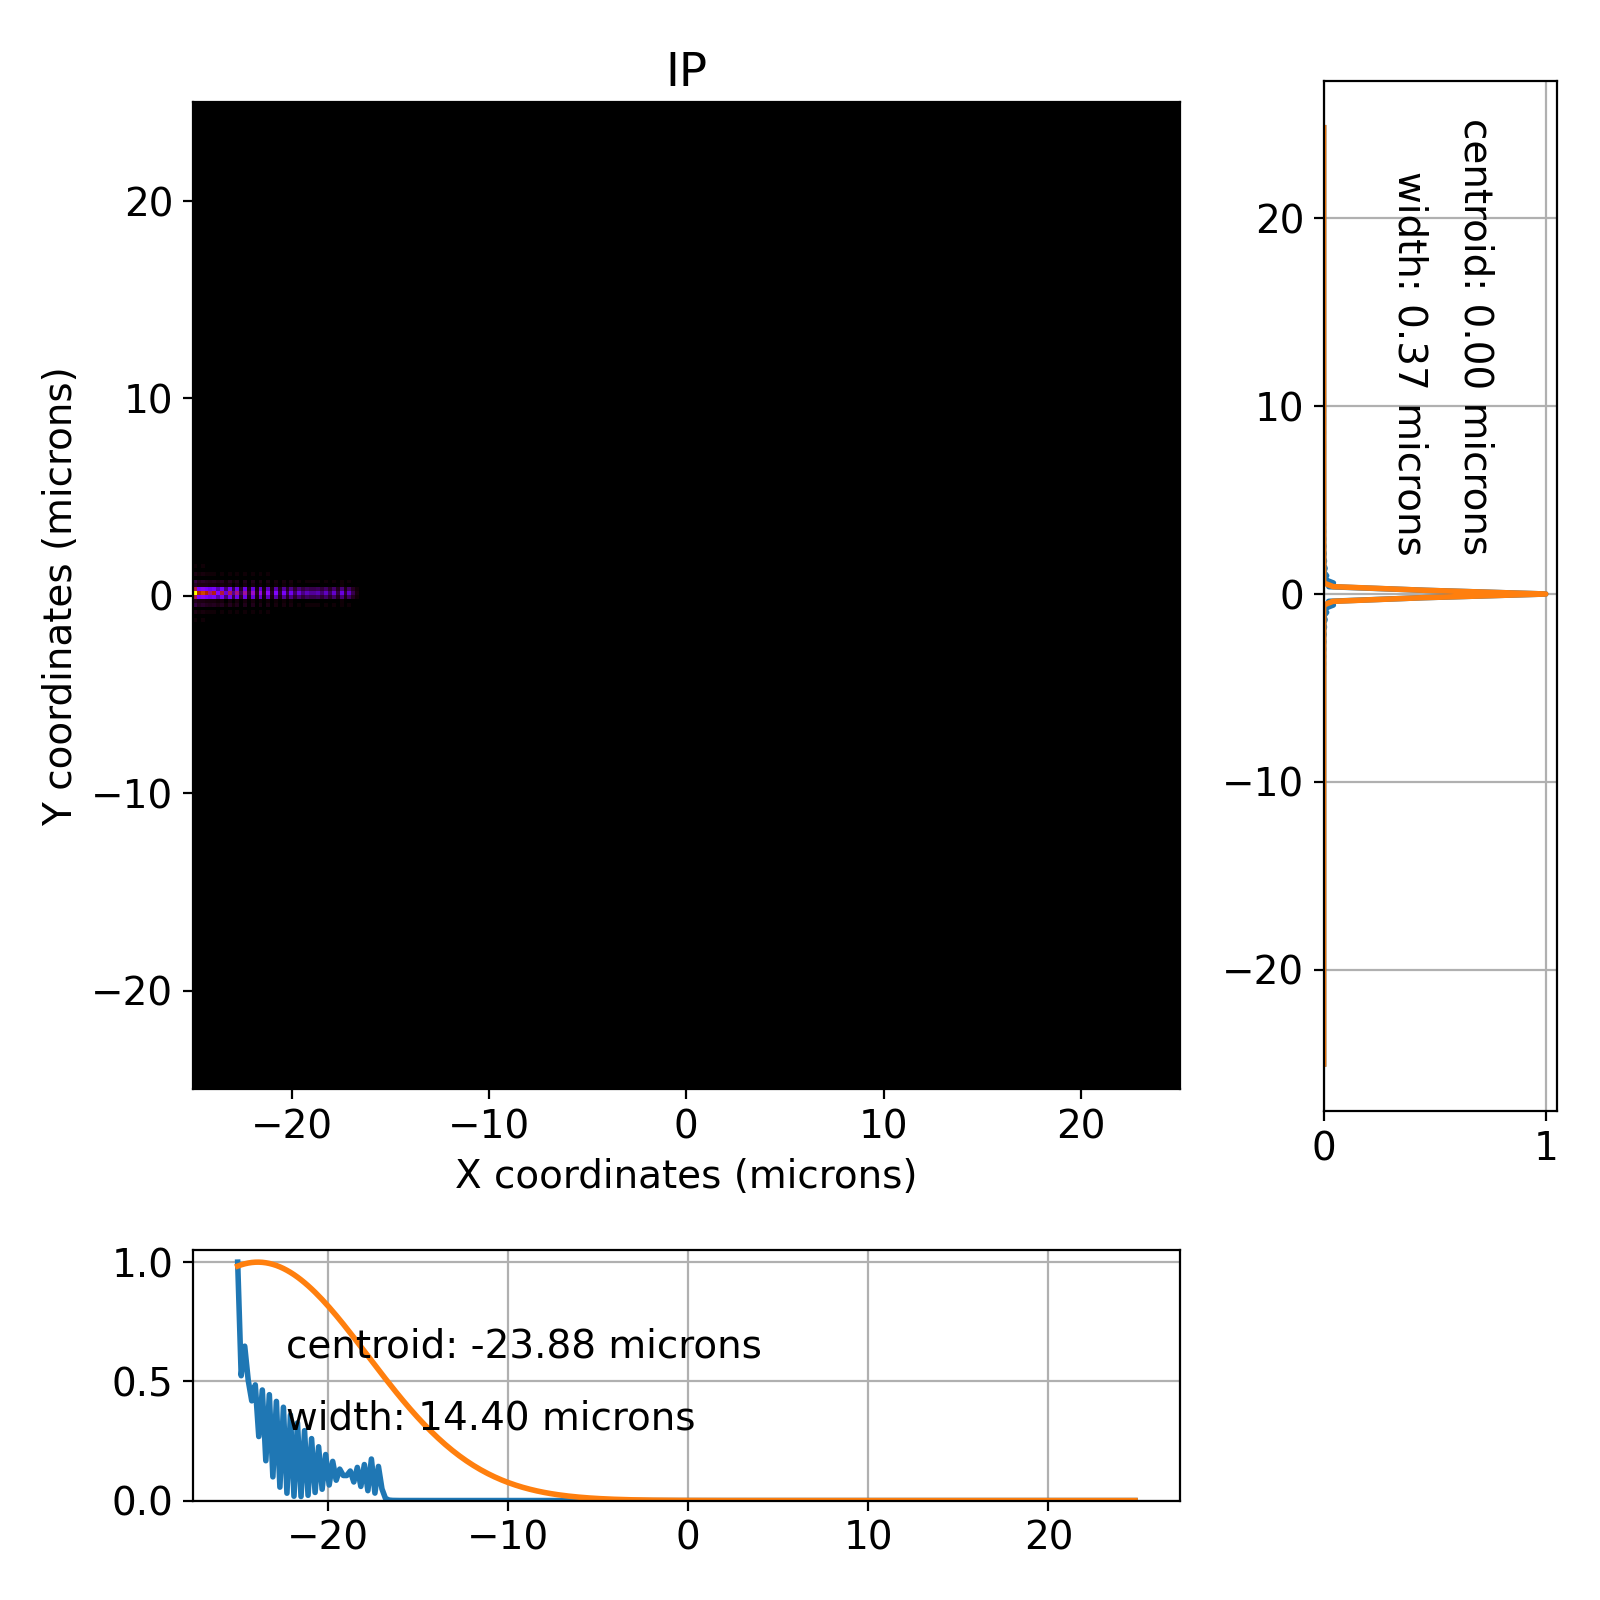

<IPython.core.display.Javascript object>


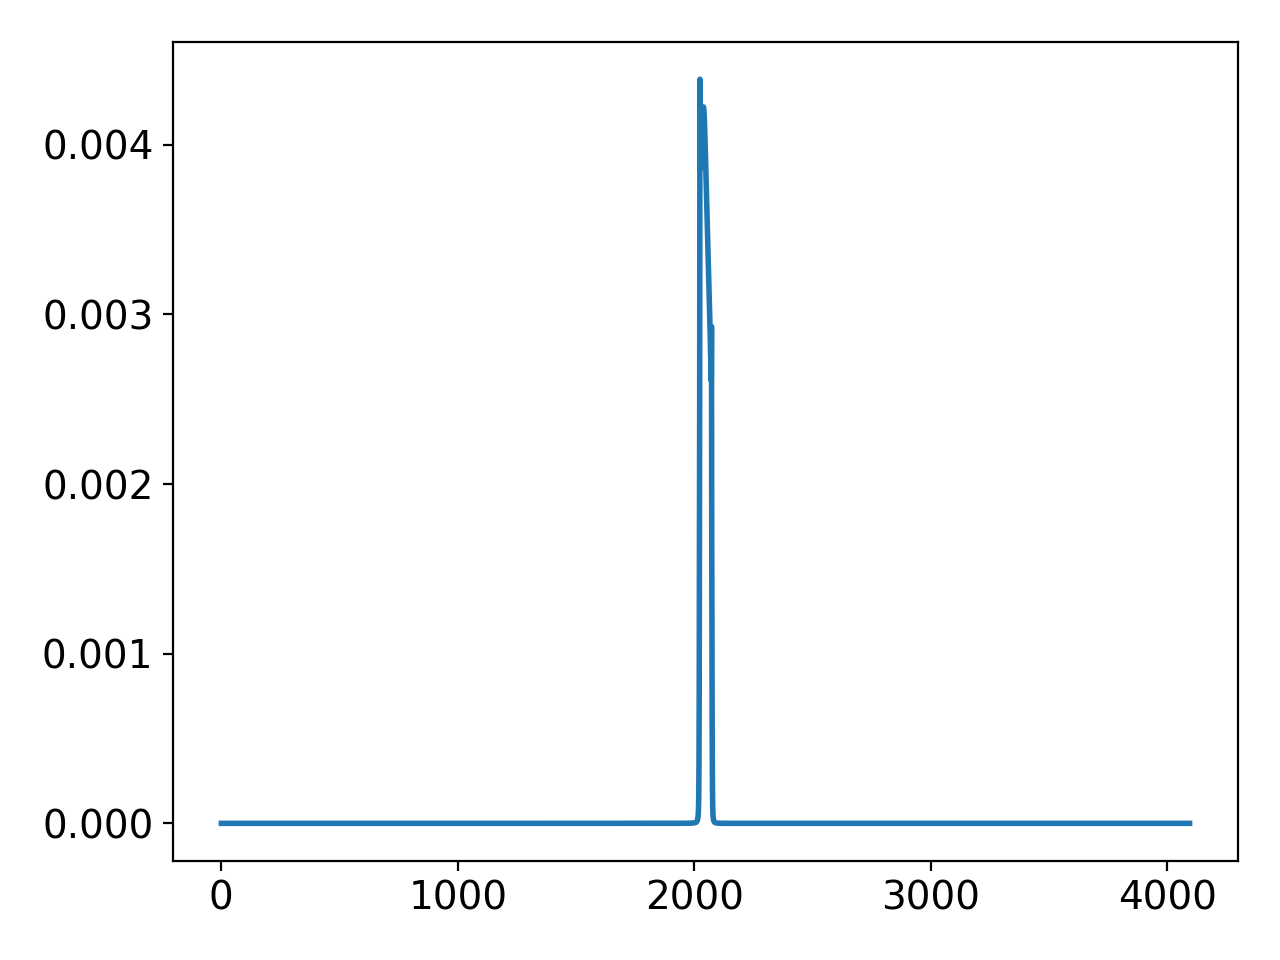

In [6]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [7]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

In [8]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG2','IP'])

FWHM in x: 359.9976963997878 microns
FWHM in y: 359.9976963997878 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414916889636518
5.414916889636518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.64
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.26
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.86
zx: 

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/util.py:101: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-((x - x0) ** 2 / (2 * w ** 2)))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/util.py:101: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-((x - x0) ** 2 / (2 * w ** 2)))
/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.26
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99659768986993 microns
FWHM in y: 359.99659768986993 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414933456015018
5.414933456015018
mr1l0
zx: 110.0

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.26
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99565594386905 microns
FWHM in y: 359.99565594386905 microns
F

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99487115931237 microns
FWHM in y: 359.99487115931237 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414959488895519
5.414959488895519
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mr

zx: 360.23
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9939294223773 microns
FWHM in y: 359.9939294223773 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41497368864852
5.41497368864852
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
z

zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.99298769038734 microns
FWHM in y: 359.99298769038734 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41498788840152
5.41498788840152
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
z

zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.27
zy: 360.16
azimuth -0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9920459633423 microns
FWHM in y: 359.9920459633423 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415002088154521
5.415002088154521
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00


zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9912611945823 microns
FWHM in y: 359.9912611945823 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150139212820205
5.4150139212820205
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimut

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9903194766029 microns
FWHM in y: 359.9903194766029 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150281210350215
5.4150281210350215
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mr

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.9892208118768 microns
FWHM in y: 359.9892208118768 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415044687413522
5.415044687413522
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.24
zy: 360.12
azimuth 693.59

zx: 360.25
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
YAG2
zx: 3.05
zy: 3.05
azimuth -0.01 mrad
FWHM in x: 359.98827910461137 microns
FWHM in y: 359.98827910461137 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415058887166522
5.415058887166522
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 

zx: 360.24
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.28
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98733740229073 microns
FWHM in y: 359.98733740229073 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415073086919522
5.415073086919522
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.

zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9860818068882 microns
FWHM in y: 359.9860818068882 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415092019923523
5.415092019923523
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9851401161051 micr

zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.98419843026664 microns
FWHM in y: 359.98419843026664 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415120419429525
5.415120419429525
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.

zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.27
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9832567493729 microns
FWHM in y: 359.9832567493729 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415134619182525
5.415134619182525
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29

zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.27
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.29
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.01 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.01 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.01 mrad
FWHM in x: 359.9823150734238 microns
FWHM in y: 359.9823150734238 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415148818935524
5.415148818935524
mr1l0
zx: 110.00


zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.981373402419 microns
FWHM in y: 359.981373402419 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415163018688525
5.415163018688525
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c

zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.9804317363588 microns
FWHM in y: 359.9804317363588 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415177218441526
5.415177218441526
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad

FWHM in x: 359.9794900752432 microns
FWHM in y: 359.9794900752432 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415191418194526
5.415191418194526
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.30
zy: 360.16
azimuth -0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z

zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97760676784486 microns
FWHM in y: 359.97760676784486 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415219817700527
5.415219817700527
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth 

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.31
zy: 360.16
azimuth -0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth -0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 

zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97572348022413 microns
FWHM in y: 359.97572348022413 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4152482172065275
5.4152482172065275
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mr

zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97478184383004 microns
FWHM in y: 359.97478184383004 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415262416959529
5.415262416959529
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mr

zx: -0.88
zy: -0.88
azimuth -0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth -0.00 mrad
drift11
delta z: -0.00
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth -0.00 mrad
drift12
delta z: -0.00
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth -0.00 mrad
FWHM in x: 359.97384021238025 microns
FWHM in y: 359.97384021238025 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4152766167125295
5.4152766167125295
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 

zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.97289858587453 microns
FWHM in y: 359.97289858587453 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41529081646553
5.41529081646553
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx:

FWHM in x: 359.97195696431305 microns
FWHM in y: 359.97195696431305 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4153050162185306
5.4153050162185306
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx

zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9710153476958 microns
FWHM in y: 359.9710153476958 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41531921597153
5.41531921597153
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mr

focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.97007373602247 microns
FWHM in y: 359.97007373602247 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415333415724531
5.415333415724531
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 35

zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9691321292932 microns
FWHM in y: 359.9691321292932 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415347615477531
5.415347615477531
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 

zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.96819052750794 microns
FWHM in y: 359.96819052750794 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415361815230531
5.415361815230531
mr1l0
zx: 110.00
zy: 110.00
azi

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9672489306666 microns
FWHM in y: 359.9672489306666 microns
FWHM Divergence (x)

zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.00 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.00 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.00 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.00 mrad
FWHM in x: 359.9663073387692 microns
FWHM in y: 359.9663073387692 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415390214736533
5.415390214736533
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
az

zx: 360.33
zy: 360.16
azimuth 0.00 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9653657518157 microns
FWHM in y: 359.9653657518157 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415404414489533
5.415404414489533
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.0

zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.964424169806 microns
FWHM in y: 359.964424169806 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415418614242532
5.415418614242532
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
de

zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.96348259274 microns
FWHM in y: 359.96348259274 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415432813995535
5.415432813995535
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.

FWHM in x: 359.96254102061795 microns
FWHM in y: 359.96254102061795 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415447013748533
5.415447013748533
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 3

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.34
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
z

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.34
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
z

zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9597163339136 microns
FWHM in y: 359.9597163339136 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415489613007535
5.415489613007535
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.0

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04


zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9576763100754 microns
FWHM in y: 359.9576763100754 microns
FWHM Divergence (x)

zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.95673476843893 microns
FWHM in y: 359.95673476843893 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415534578892036
5.415534578892036
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9557932317458 microns
FWHM in y: 359.9557932317458 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415548778645037
5.415548778645037
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad


zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
z

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx:

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.01 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.9518702154017 microns
FWHM in y: 359.9518702154017 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415607944282539
5.415607944282539
mr1l0
zx: 110.00
zy: 110.00
azimu

zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.01 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.01 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.01 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.01 mrad
FWHM in x: 359.95092870424935 microns
FWHM in y: 359.95092870424935 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415622144035539
5.415622144035539
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29


zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9499871980402 microns
FWHM in y: 359.9499871980402 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41563634378854
5.41563634378854
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
de

zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94904569677436 microns
FWHM in y: 359.94904569677436 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41565054354154
5.41565054354154
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.0

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94810420045144 microns
FWHM in y: 359.94810420045144 microns
FWHM Divergence (

zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94716270907185 microns
FWHM in y: 359.94716270907185 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415678943047541
5.415678943047541
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azi

zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9462212226353 microns
FWHM in y: 359.9462212226353 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415693142800541
5.415693142800541
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azi

zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94527974114175 microns
FWHM in y: 359.94527974114175 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415707342553542
5.415707342553542
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
a

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94433826459124 microns
FWHM in y: 359.94433826459124 microns
FWHM Divergence (

zx: 360.36
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9433967929837 microns
FWHM in y: 359.9433967929837 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157357420595424
5.4157357420595424
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
a

zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.94245532631913 microns
FWHM in y: 359.94245532631913 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157499418125425
5.4157499418125425
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2


FWHM in x: 359.9415138645974 microns
FWHM in y: 359.9415138645974 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157641415655435
5.4157641415655435
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 3

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.16
azimuth 0.02 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimu

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx:

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9385326017541 microns
FWHM in y: 359.9385326017541 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415809107450046
5.415

zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9375911606274 microns
FWHM in y: 359.9375911606274 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415823307203046
5.415823307203046
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimu

zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.02 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9366497244432 microns
FWHM in y: 359.9366497244432 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415837506956046
5.415837506956046
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.0

zx: 0.00
zy: 0.00
azimuth 0.02 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.02 mrad
FWHM in x: 359.9357082932019 microns
FWHM in y: 359.9357082932019 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415851706709046
5.415851706709046
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad


zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.02 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.02 mrad
drift10
delta z: 0.0

zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.93366854246784 microns
FWHM in y: 359.93366854246784 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415882472840547
5.415882472840547
mr1l0
zx: 110.00
zy: 110.00
azi

zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.93272712687786 microns
FWHM in y: 359.93272712687786 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415896672593549
5.415896672593549
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mra

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx:

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.39
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9306874100549 microns
FWHM in y: 359.9306874100549 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415927438725049
5.415

zx: 360.39
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
IP
zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9297460101161 microns
FWHM in y: 359.9297460101161 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415941638478049
5.415941638478049
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azi

zx: 0.00
zy: 0.00
azimuth 0.03 mrad
drift12
delta z: 0.00
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
YAG2
zx: 3.04
zy: 3.04
azimuth 0.03 mrad
FWHM in x: 359.9288046151196 microns
FWHM in y: 359.9288046151196 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415955838231048
5.415955838231048
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.54 mrad


zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.38
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.02
zx: 360.39
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.42
zy: 360.16
azimuth 0.03 mrad
crlx
focal length: 0.93
zx: -0.93
zy: 360.16
azimuth 0.03 mrad
crly
focal length: 0.93
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: -0.93
zy: -0.93
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
slit
zx: -0.88
zy: -0.88
azimuth 0.03 mrad
drift11
delta z: 0.00
zx:

In [25]:
90+(248-205)

133

<IPython.core.display.Javascript object>


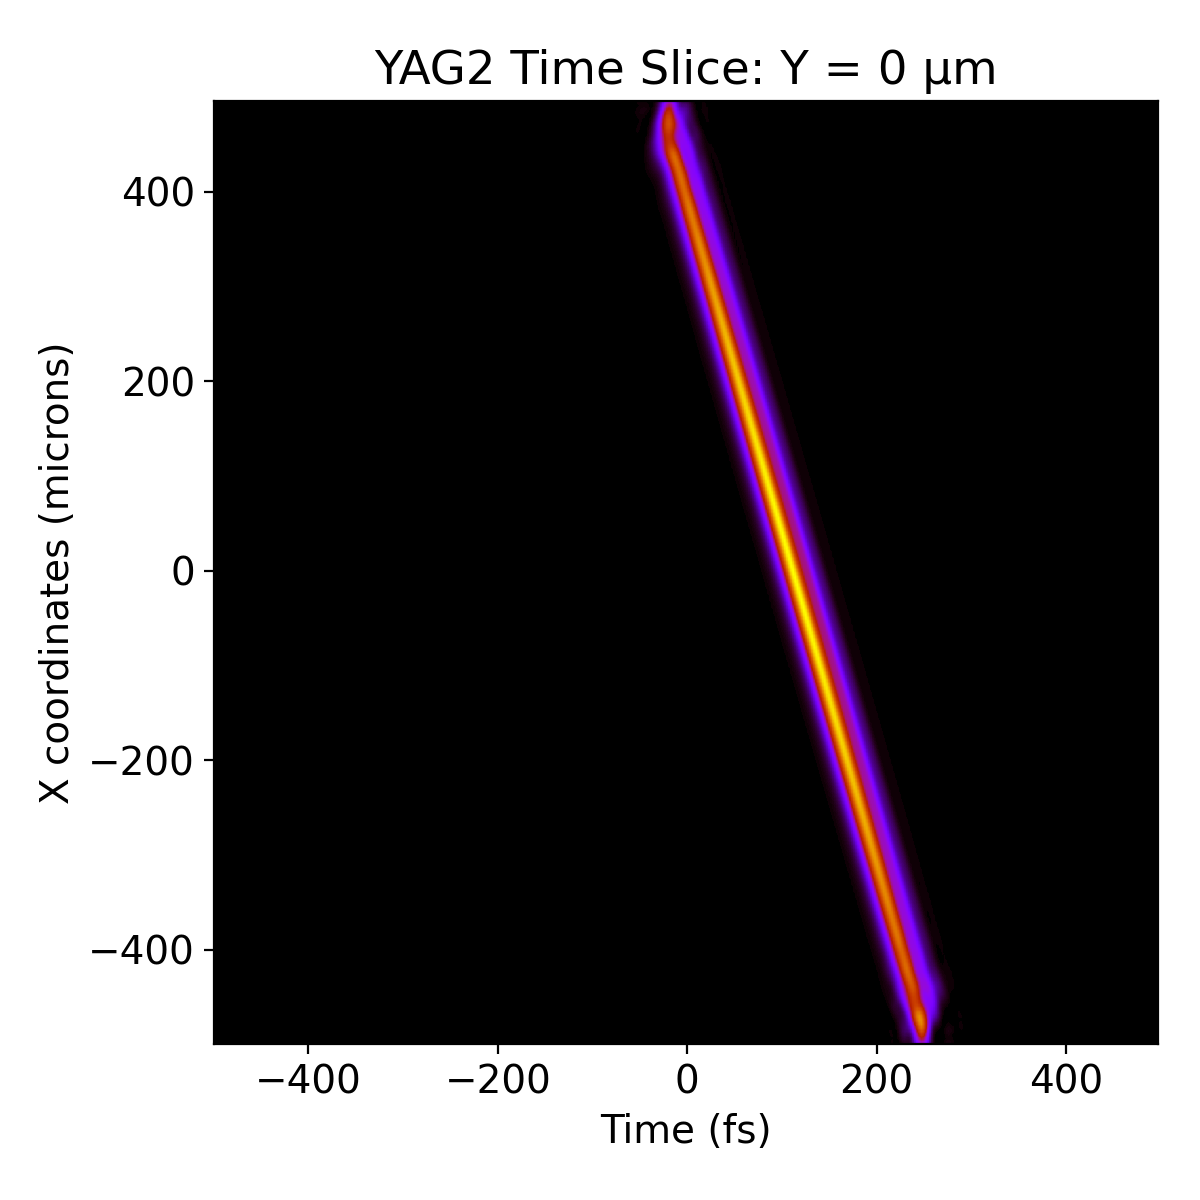

128


<IPython.core.display.Javascript object>


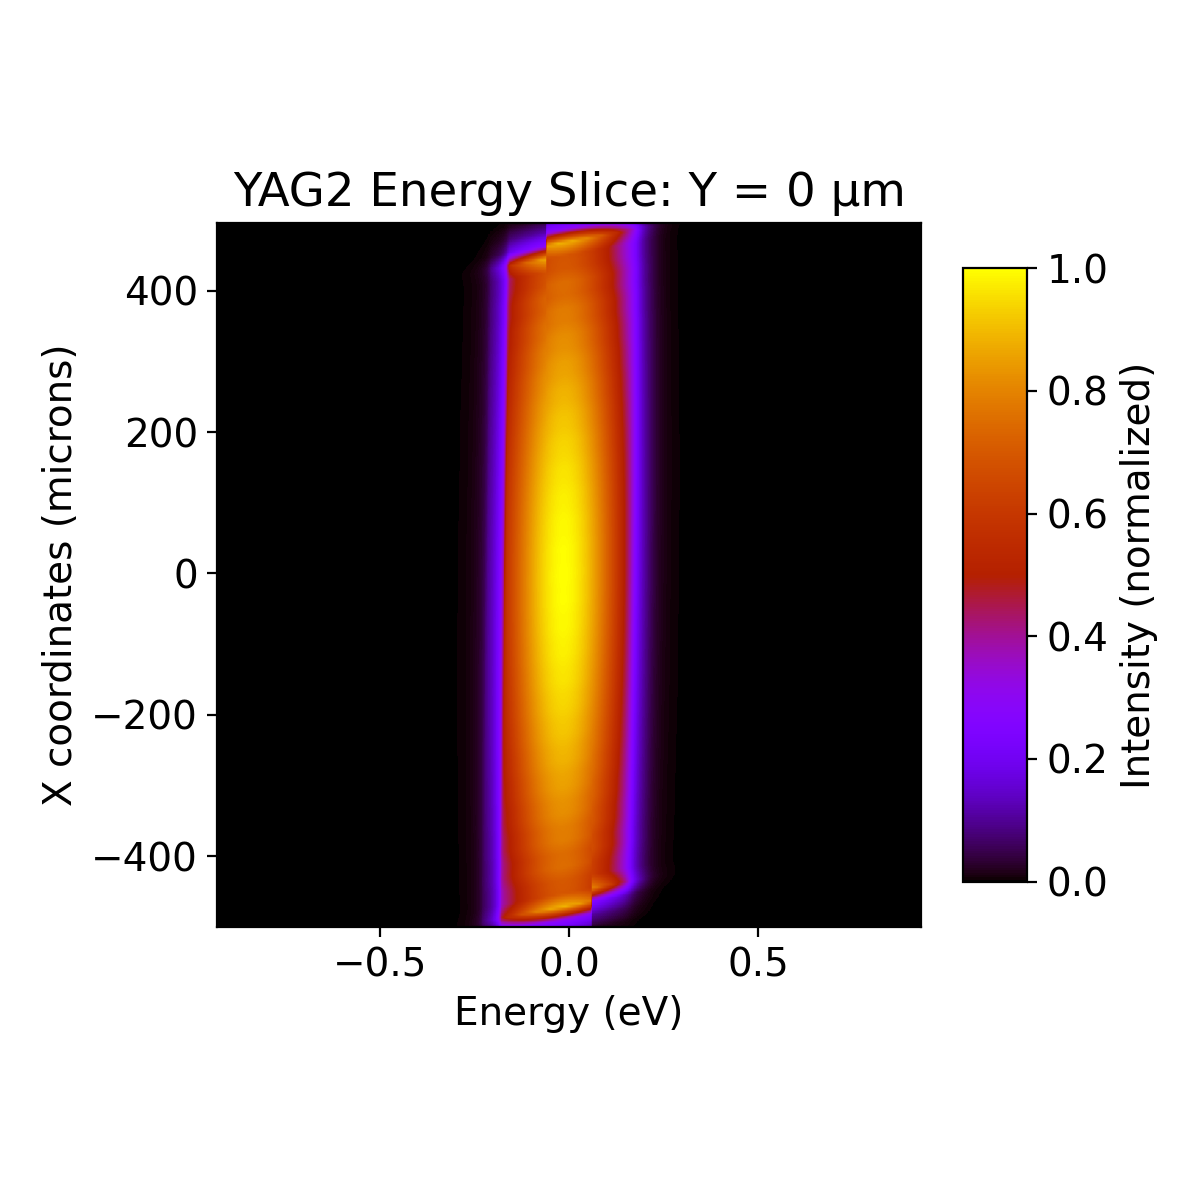

<IPython.core.display.Javascript object>


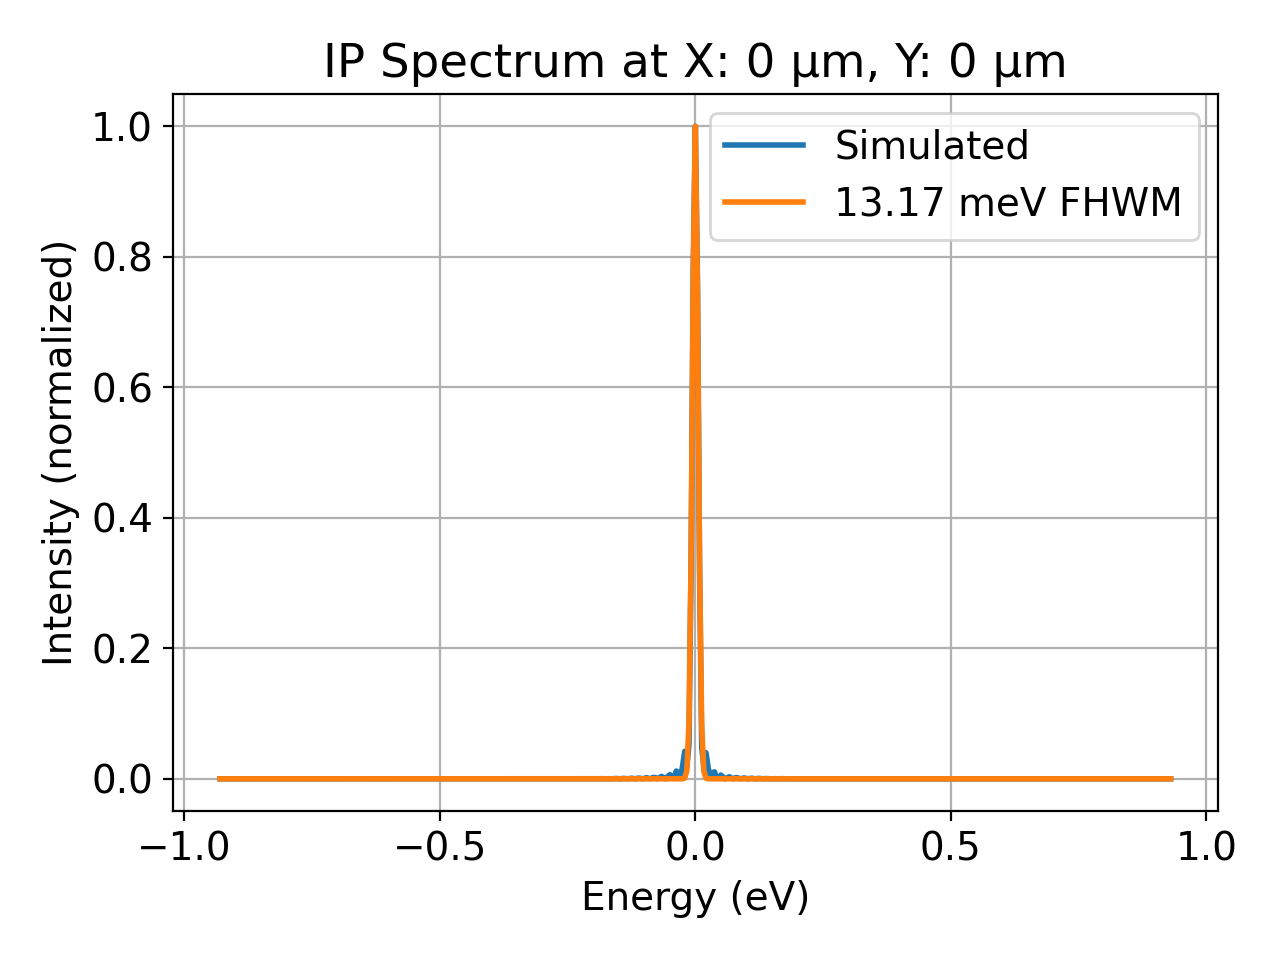

<IPython.core.display.Javascript object>


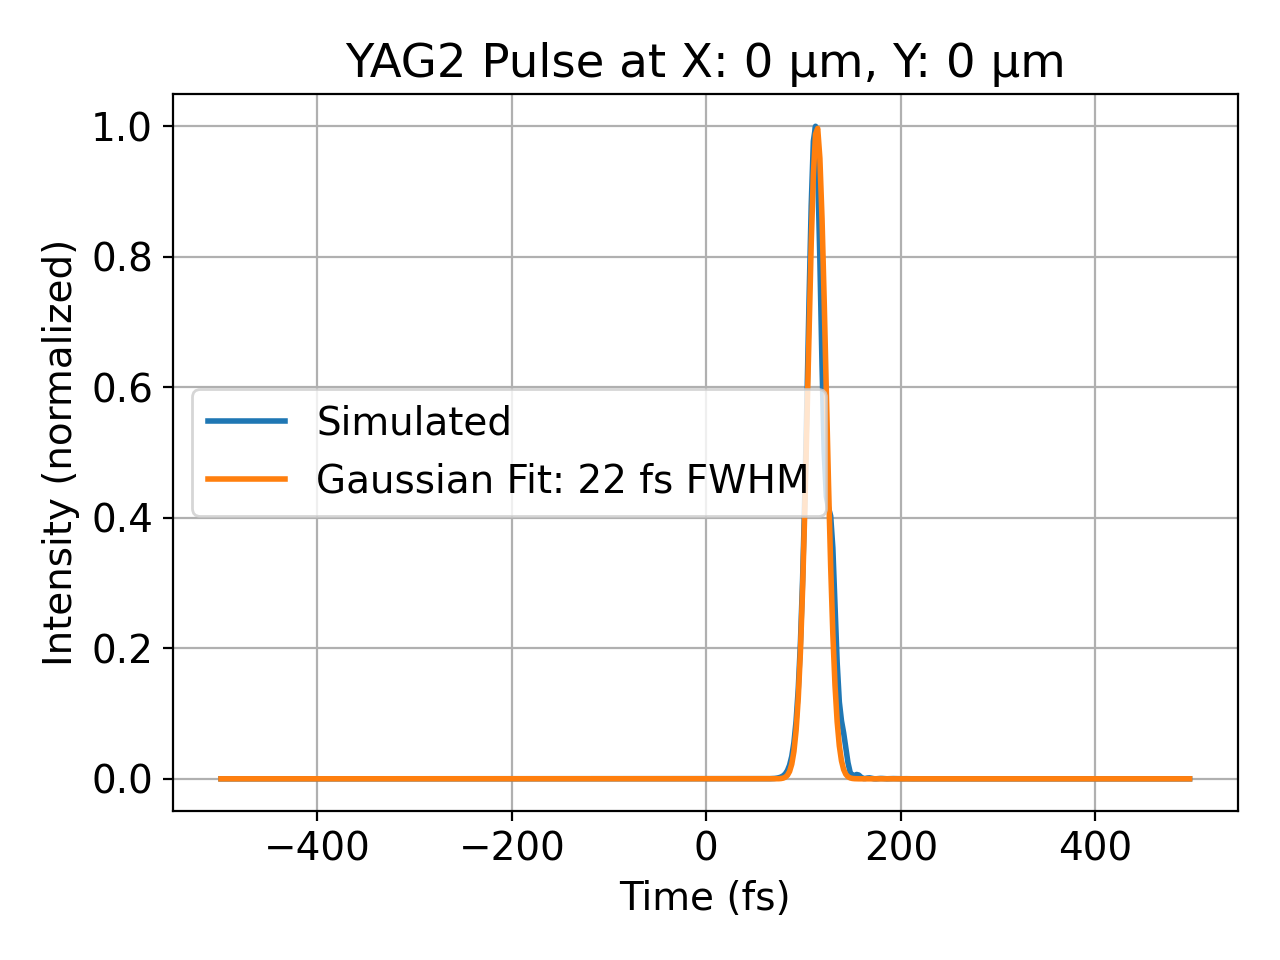

<IPython.core.display.Javascript object>


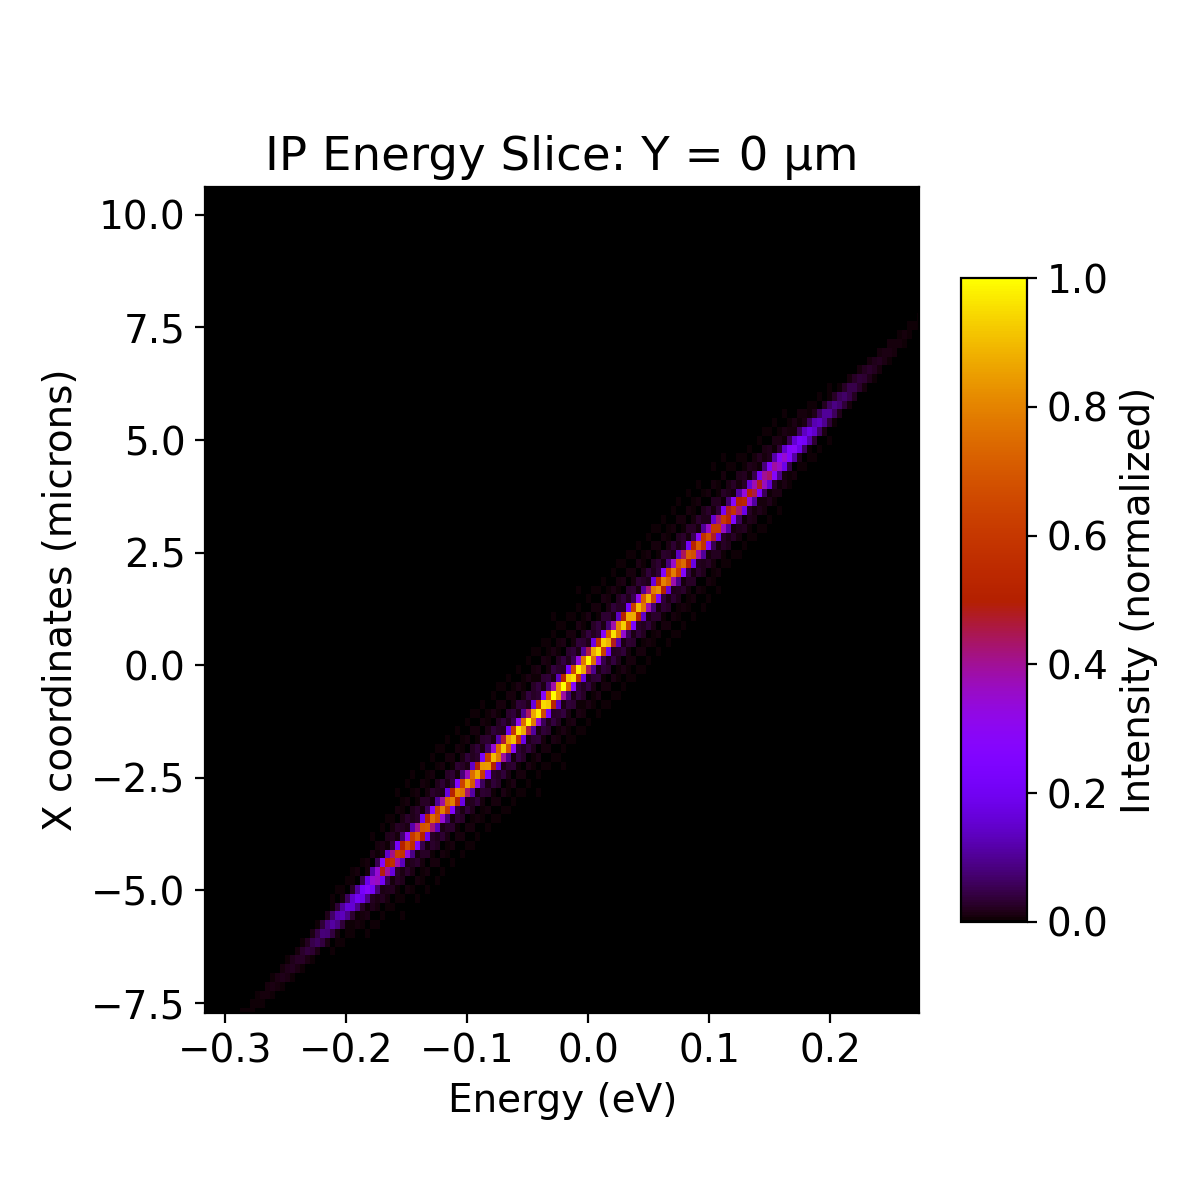

<IPython.core.display.Javascript object>


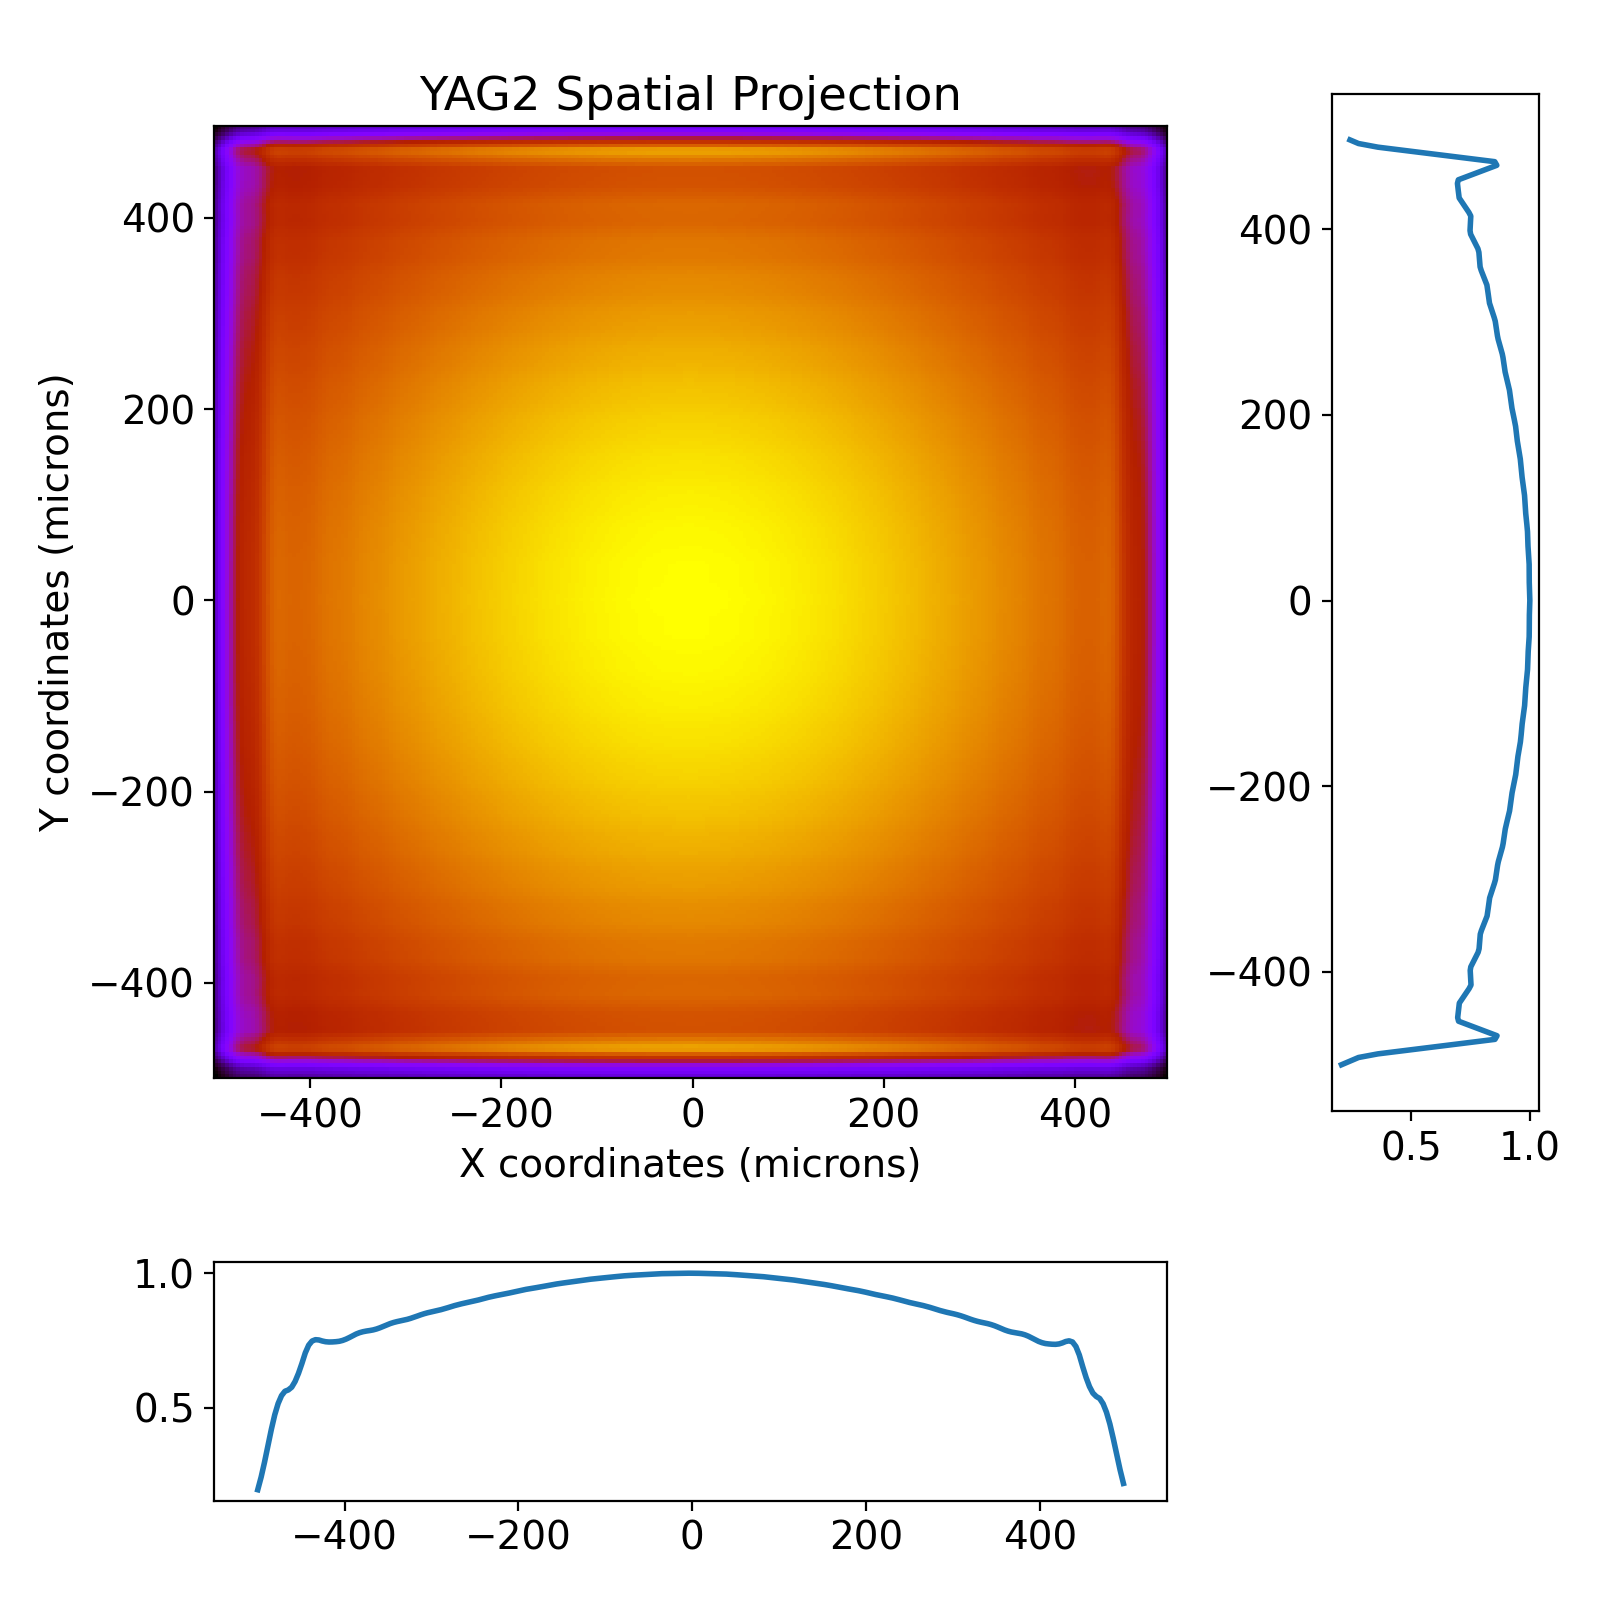

<IPython.core.display.Javascript object>


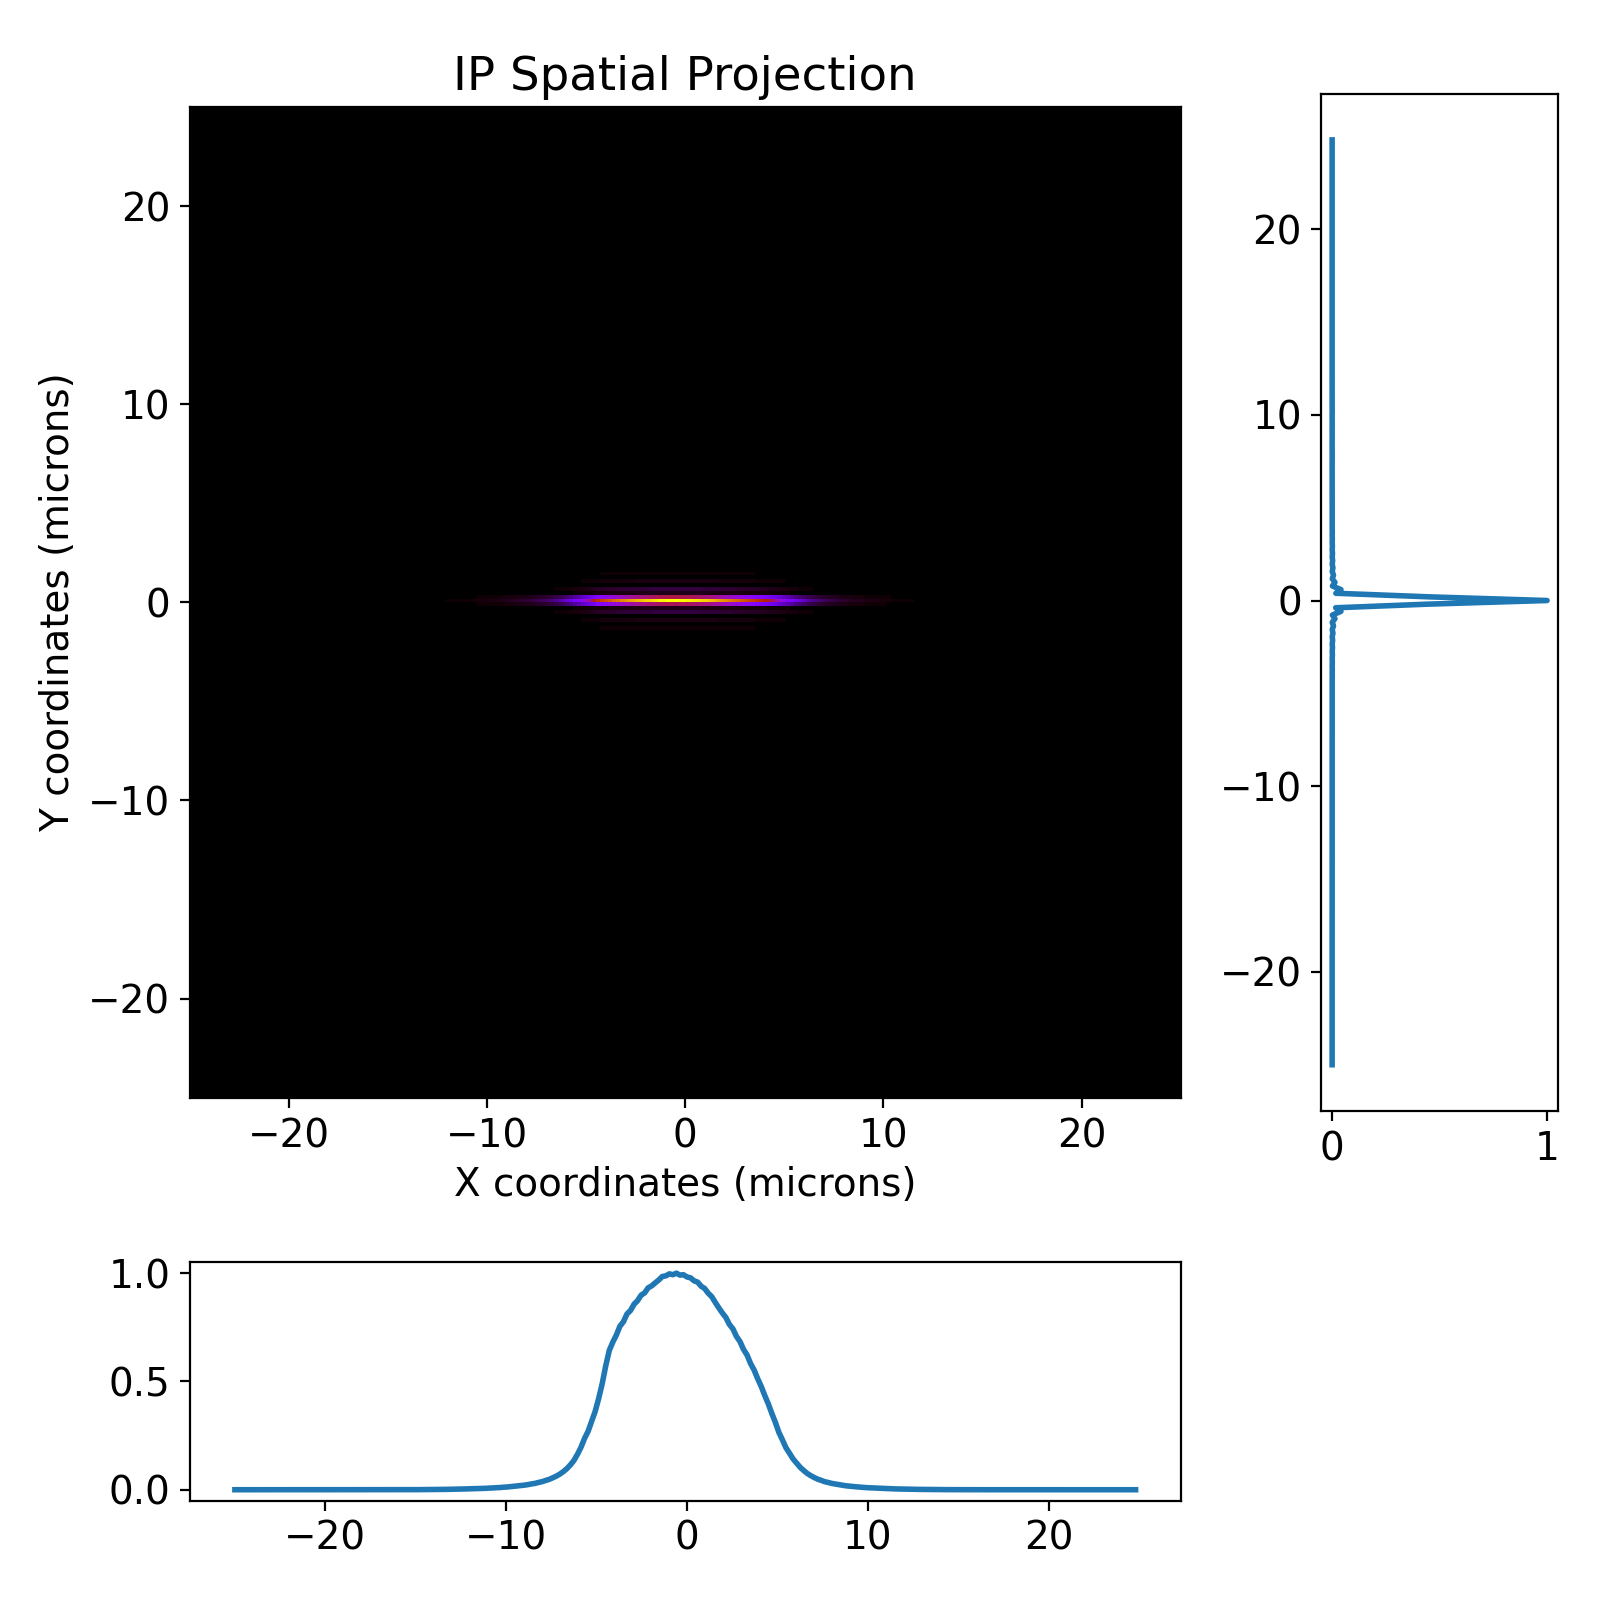

<IPython.core.display.Javascript object>


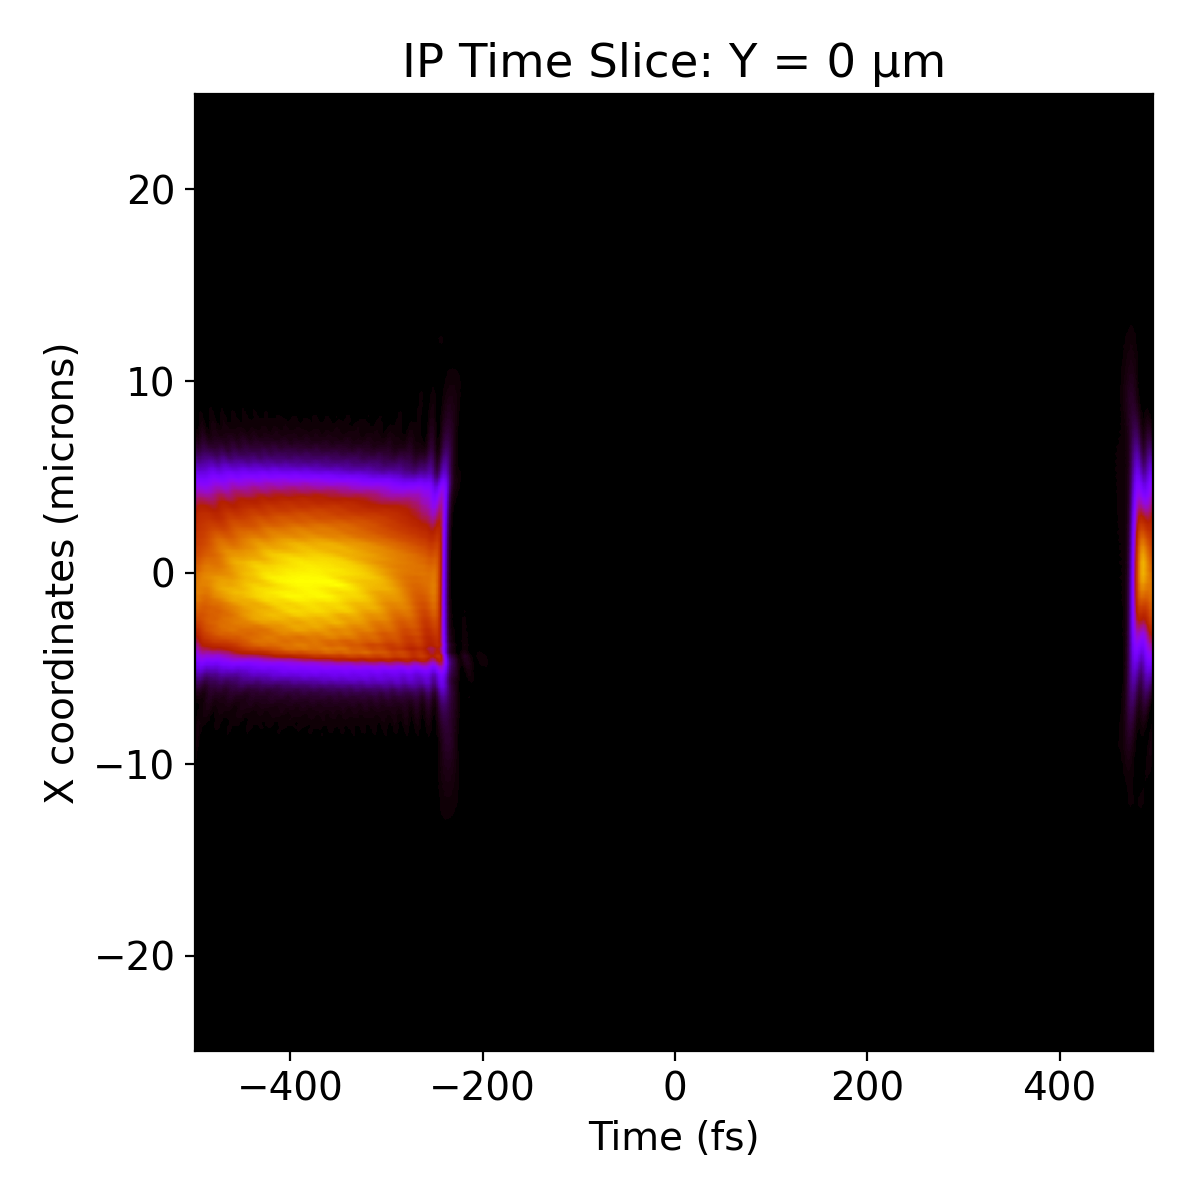

128


In [9]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('IP',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
pulse_test.imshow_projection('IP')
pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


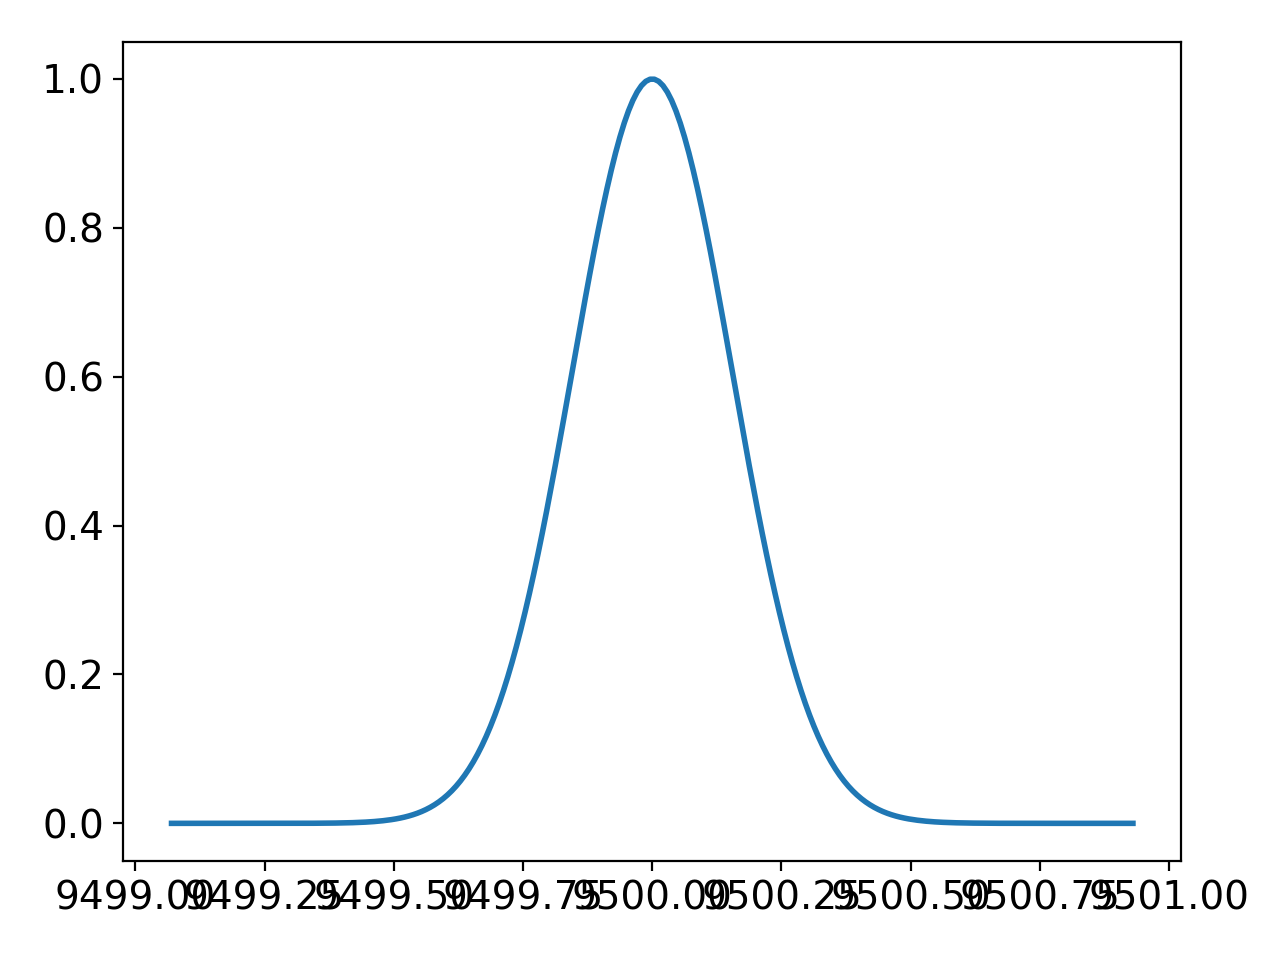

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8